In [16]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import os
os.environ["USE_TORCH"] = "1"


In [19]:
! pip install tf-keras

/opt/anaconda3/envs/pot/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.7 MB/s eta 0:00:0000:0100:010m


In [14]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  # 124M parameters

sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

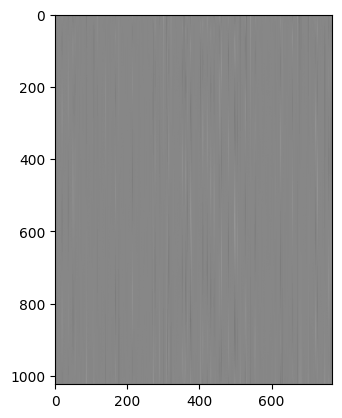

In [4]:
import matplotlib.pyplot as plt
plt.imshow(sd_hf["transformer.wpe.weight"],cmap="gray")

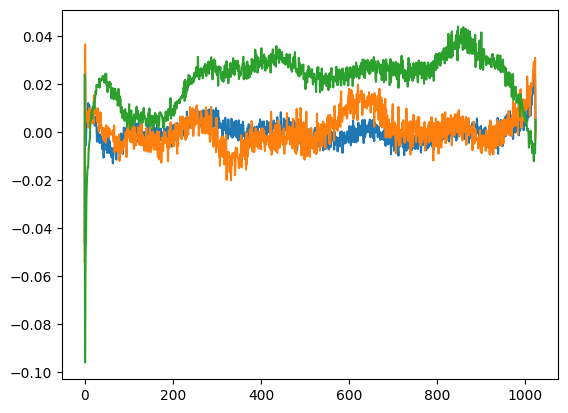

In [6]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

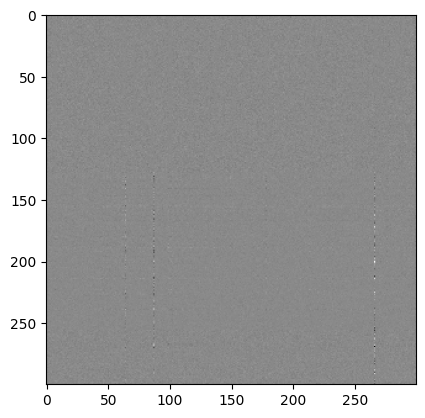

In [8]:
plt.imshow(sd_hf["transformer.h.1.attn.c_proj.weight"][:300,:300], cmap="gray")

In [21]:
from transformers import pipeline, set_seed
import os

# Set the environment variable to force transformers to use PyTorch
os.environ["USE_TORCH"] = "1"

# Initialize the text generation pipeline with the GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Set the random seed for reproducibility
set_seed(42)

# Generate text using the pipeline
generated_texts = generator("hello im a lanaguge model", max_length=30, num_return_sequences=5)

# Print the generated texts
for idx, text in enumerate(generated_texts):
    print(f"Generated Text {idx + 1}: {text['generated_text']}")




Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1: hello im a lanaguge model"

"So I think you're a little bit better off using an Xposed framework which lets you run
Generated Text 2: hello im a lanaguge model which in english and german is just m.b.g /g. This is the translation of the original
Generated Text 3: hello im a lanaguge model," said the manager, who goes by her first name.

That is all we know of Lueber
Generated Text 4: hello im a lanaguge model ao ka karla ai karla tae na ti aon karla ka ka ko
Generated Text 5: hello im a lanaguge model, so i can't really get too high on that (although i can't imagine a more powerful model that uses
